In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Phân tích nghiệp vụ thông minh/data/Sales_Product_Combined.csv")


In [ ]:
df

,Purchase Address,total,lable
0,"1 11th St, Atlanta, GA 30301",11.95,0
1,"1 11th St, Los Angeles, CA 90001",1700.00,2
2,"1 11th St, San Francisco, CA 94016",700.00,1
3,"1 12th St, Los Angeles, CA 90001",150.00,0
4,"1 12th St, New York City, NY 10001",11.99,0
...,...,...,...
140782,"999 Wilson St, Atlanta, GA 30301",99.99,0
140783,"999 Wilson St, Los Angeles, CA 90001",999.99,1
140784,"999 Wilson St, New York City, NY 10001",150.00,0
140785,"999 Wilson St, Portland, OR 97035",2.99,0


In [ ]:
# Lấy các giá trị duy nhất trong cột "product"
unique_products = df['Product'].unique()

# Đếm số lượng các giá trị duy nhất
num_unique_products = len(unique_products)
print(num_unique_products)

19


In [ ]:
# Chuyển đổi cột "price" thành giá trị số thực
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [ ]:
df['Quantity Ordered']= df['Quantity Ordered'].astype(float)

In [ ]:
df.dropna(axis=0, inplace=True)

df["total"] = df['Quantity Ordered'] * df['Price']
df = df.groupby("Purchase Address")["total"].sum().reset_index()

In [ ]:
df["total"]

0           11.95
1         1700.00
2          700.00
3          150.00
4           11.99
           ...   
140782      99.99
140783     999.99
140784     150.00
140785       2.99
140786     150.00
Name: total, Length: 140787, dtype: float64

In [ ]:
import numpy as np
X = np.array(df['total']).reshape(-1, 1)

In [ ]:
X

array([[  11.95],
       [1700.  ],
       [ 700.  ],
       ...,
       [ 150.  ],
       [   2.99],
       [ 150.  ]])

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
df['lable'] = kmeans.labels_

In [ ]:
def check_type (row):
    if row['lable'] == 2:
      return 'Khách VIP'
    elif row['lable'] == 1:
      return 'Khách thường'
    else:
      return 'Khách mua ít'

In [ ]:
df['Type'] = df.apply(check_type, axis=1)
df.sort_values("total", ascending=False)

,Purchase Address,total,lable,Type
89038,"668 Park St, San Francisco, CA 94016",4379.99,2,Khách VIP
108753,"795 1st St, Atlanta, GA 30301",4100.00,2,Khách VIP
45621,"391 1st St, Seattle, WA 98101",4100.00,2,Khách VIP
148,"10 1st St, San Francisco, CA 94016",4000.00,2,Khách VIP
98849,"731 11th St, New York City, NY 10001",3919.88,2,Khách VIP
...,...,...,...,...
121134,"873 Hill St, San Francisco, CA 94016",2.99,0,Khách mua ít
67974,"533 Church St, Austin, TX 73301",2.99,0,Khách mua ít
121126,"873 Forest St, Boston, MA 02215",2.99,0,Khách mua ít
67962,"533 Adams St, San Francisco, CA 94016",2.99,0,Khách mua ít


from matplotlib import pyplot as plt
_df_0['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['lable'].plot(kind='hist', bins=20, title='lable')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='total', y='lable', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['lable'].plot(kind='line', figsize=(8, 4), title='lable')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_6['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_6, x='total', y='Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_7['Type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_7, x='lable', y='Type', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
df[df['lable'] == 2]

,Purchase Address,total,lable,Type
1,"1 11th St, Los Angeles, CA 90001",1700.00,2,Khách VIP
5,"1 12th St, San Francisco, CA 94016",1711.99,2,Khách VIP
8,"1 14th St, Portland, OR 97035",1723.90,2,Khách VIP
93,"1 Meadow St, Atlanta, GA 30301",1700.00,2,Khách VIP
101,"1 Park St, New York City, NY 10001",1700.00,2,Khách VIP
...,...,...,...,...
140713,"999 Highland St, San Francisco, CA 94016",1700.00,2,Khách VIP
140716,"999 Jackson St, Boston, MA 02215",1711.95,2,Khách VIP
140736,"999 Main St, Seattle, WA 98101",1700.00,2,Khách VIP
140747,"999 North St, San Francisco, CA 94016",1711.99,2,Khách VIP


In [ ]:
df[df['lable'] == 2].min()

Purchase Address    1 11th St, Los Angeles, CA 90001
total                                        1189.96
lable                                              2
Type                                       Khách VIP
dtype: object

In [ ]:
df[df['lable'] == 2].max()

Purchase Address    999 Walnut St, Portland, OR 97035
total                                         4379.99
lable                                               2
Type                                        Khách VIP
dtype: object

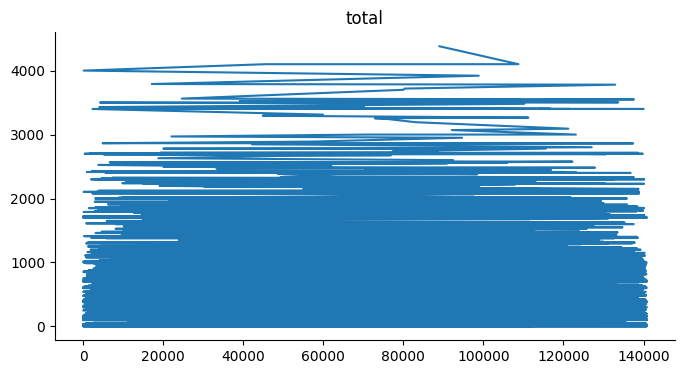

In [ ]:
from matplotlib import pyplot as plt
_df_3['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

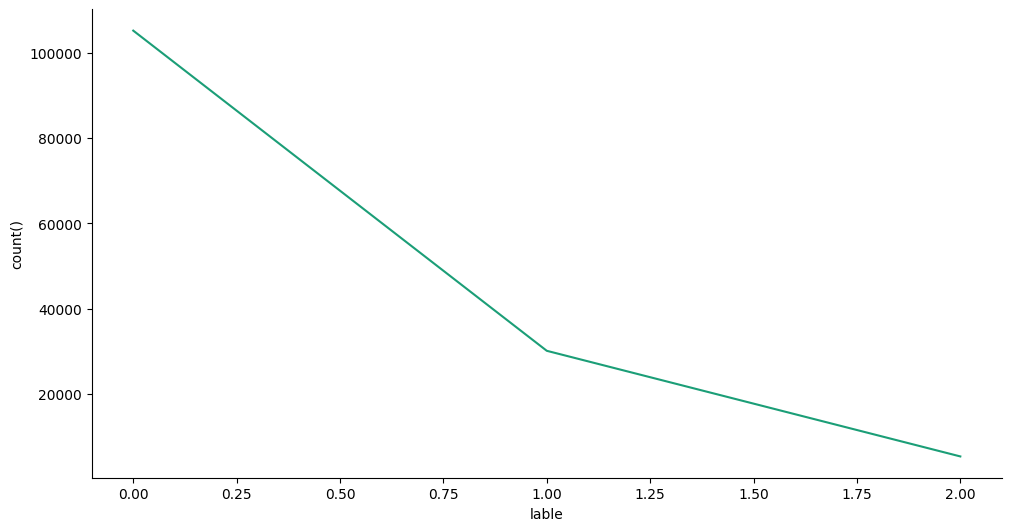

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['lable']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'lable'}, axis=1)
              .sort_values('lable', ascending=True))
  xs = counted['lable']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('lable', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lable')
_ = plt.ylabel('count()')

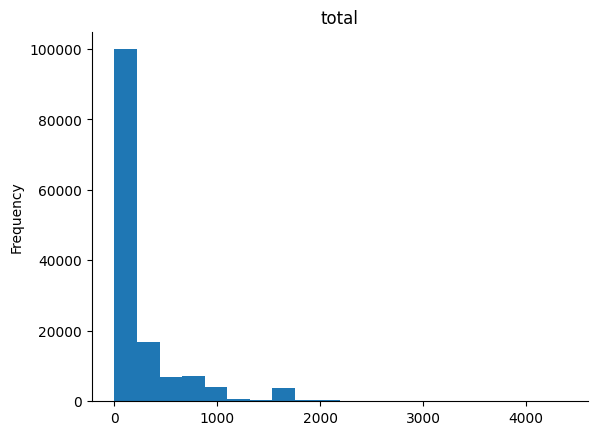

In [ ]:
from matplotlib import pyplot as plt
_df_0['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

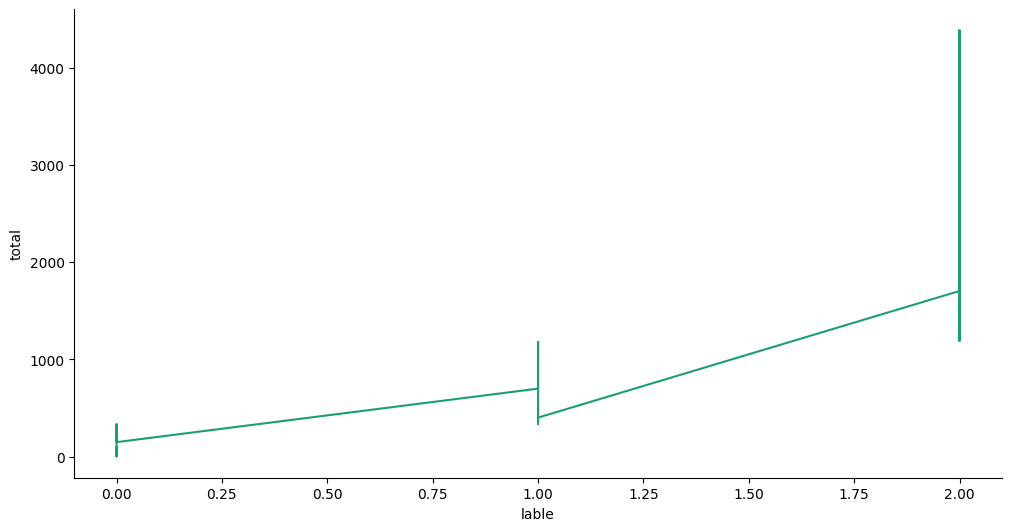

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lable']
  ys = series['total']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('lable', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lable')
_ = plt.ylabel('total')

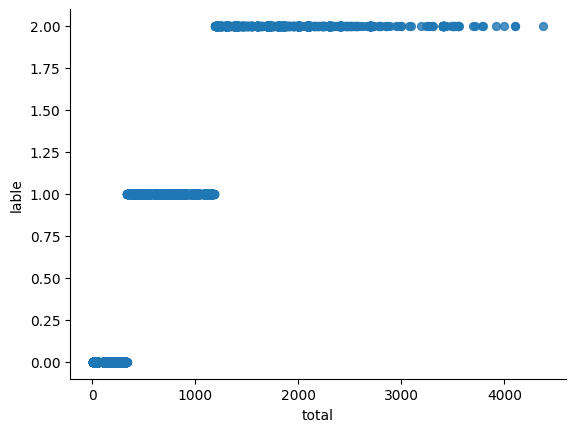

In [ ]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total', y='lable', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

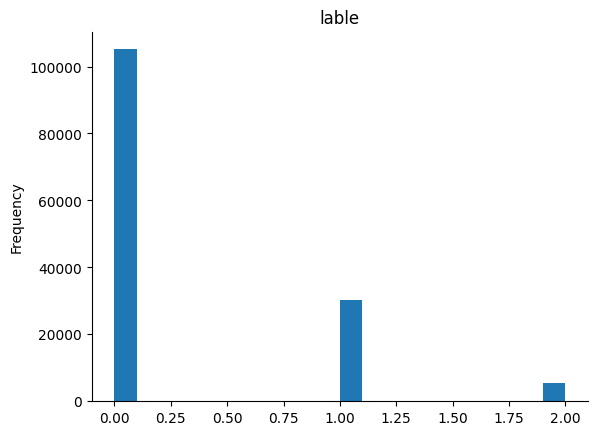

In [ ]:
from matplotlib import pyplot as plt
_df_5['lable'].plot(kind='hist', bins=20, title='lable')
plt.gca().spines[['top', 'right',]].set_visible(False)

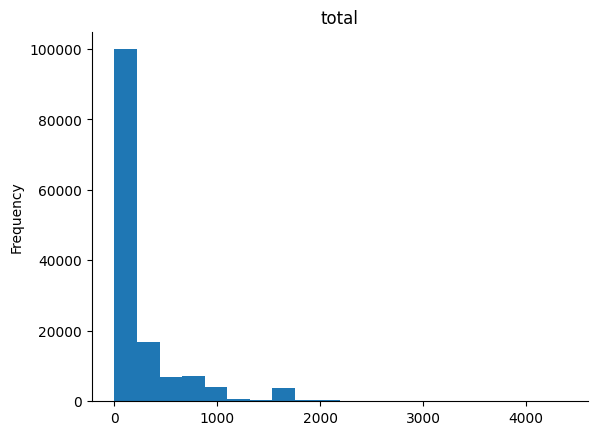

In [ ]:
from matplotlib import pyplot as plt
_df_4['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df[df['lable'] == 0]

,Purchase Address,total,lable,Type
0,"1 11th St, Atlanta, GA 30301",11.95,0,Khách mua ít
3,"1 12th St, Los Angeles, CA 90001",150.00,0,Khách mua ít
4,"1 12th St, New York City, NY 10001",11.99,0,Khách mua ít
6,"1 13th St, San Francisco, CA 94016",11.99,0,Khách mua ít
7,"1 14th St, New York City, NY 10001",114.94,0,Khách mua ít
...,...,...,...,...
140781,"999 Willow St, Seattle, WA 98101",121.98,0,Khách mua ít
140782,"999 Wilson St, Atlanta, GA 30301",99.99,0,Khách mua ít
140784,"999 Wilson St, New York City, NY 10001",150.00,0,Khách mua ít
140785,"999 Wilson St, Portland, OR 97035",2.99,0,Khách mua ít


from matplotlib import pyplot as plt
_df_8['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['lable']
  ys = series['total']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('lable', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lable')
_ = plt.ylabel('total')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['lable']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'lable'}, axis=1)
              .sort_values('lable', ascending=True))
  xs = counted['lable']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('lable', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('lable')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)